# Homework 3: Using ggplot

This homework assignment is designed to get you comfortable working with `ggplot` for generating data visualizations.

We will be using the [gapminder](https://cran.r-project.org/web/packages/gapminder/README.html) dataset. It contains  information about population, life expectancy and per capita GDP by country over time.

---
# 1. Color, plot type and layers (4 points)

Install and load the `gapminder` dataset. Look at the first few rows of the data frame.

In [49]:
library(gapminder)
gapminder <- gapminder
head(gapminder)

country     continent year lifeExp pop      gdpPercap
1 Afghanistan Asia      1952 28.801   8425333 779.4453 
2 Afghanistan Asia      1957 30.332   9240934 820.8530 
3 Afghanistan Asia      1962 31.997  10267083 853.1007 
4 Afghanistan Asia      1967 34.020  11537966 836.1971 
5 Afghanistan Asia      1972 36.088  13079460 739.9811 
6 Afghanistan Asia      1977 38.438  14880372 786.1134

Now, let's create a basic scatterplot using `ggplot2` that shows how life expectancy has changed over time.

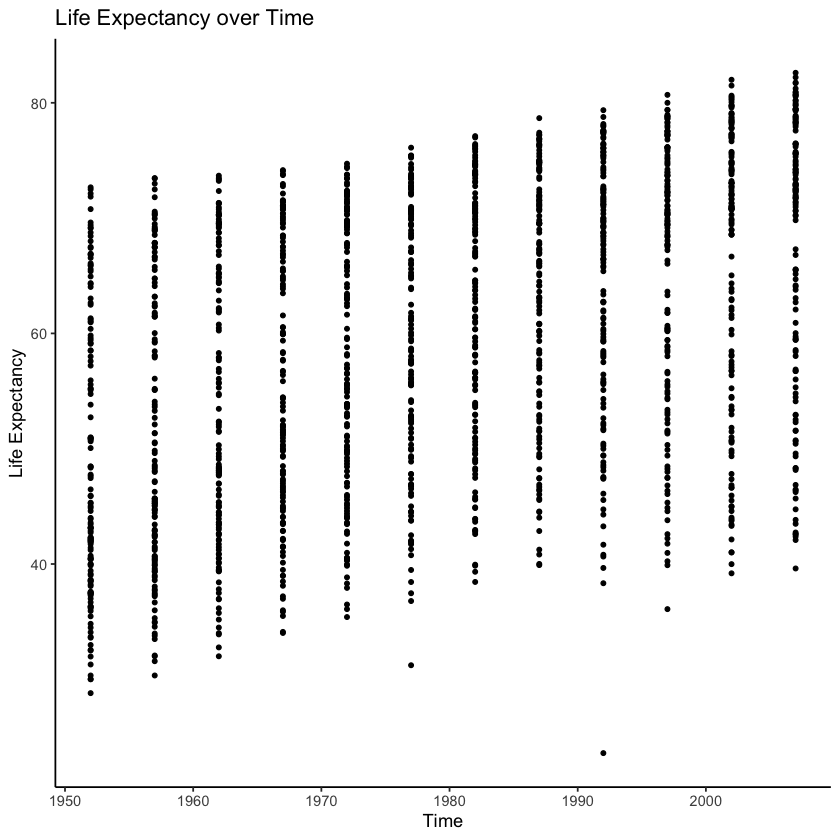

In [50]:
library(ggplot2)
ggplot(gapminder, aes(x=year, y = lifeExp)) + geom_point(size = 1) + 
ggtitle("Life Expectancy over Time") + scale_x_continuous(name = "Time") + 
scale_y_continuous(name = "Life Expectancy") + theme_classic()

We can add another layer of detail by using color to indicate continent. Modify the code from the previous question to to do so. 

What trends can you identify in the data? 

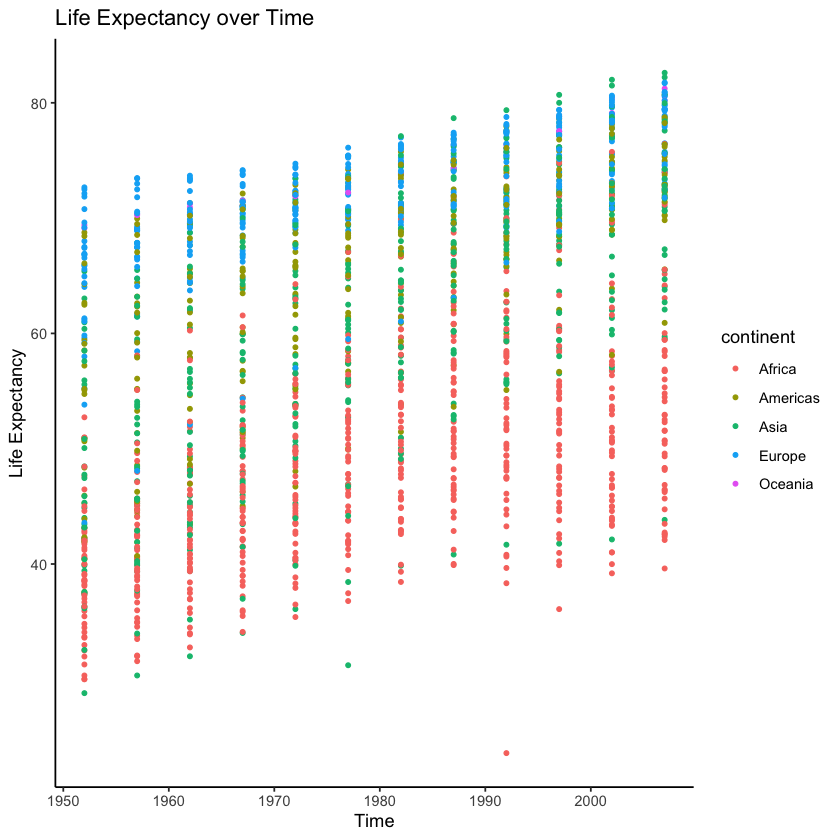

In [51]:
ggplot(gapminder, aes(x=year, y = lifeExp, color = continent)) + geom_point(size = 1) + 
ggtitle("Life Expectancy over Time") + scale_x_continuous(name = "Time") + 
scale_y_continuous(name = "Life Expectancy") + theme_classic()


> It appears that life expectancy values associated with Europe (blue dots) tends to cluster towards higher years of age, relative to the other continents and considering the range of values reported for each year. Similarly, it appears that life expectancy values for Africa cluster towards the bottom of the range of life expectancy values reported in this data set. Asia, America, and Oceania generally fall in between the cluster of Africa and Europe data points with more variability. In general there appears to be a modest linear relationship between time and life expectancy, such that life expectancy tends to increase as years progress.

Using a scatterplot probably isn’t the best type of plot for effectively visualizing change over time. Instead, modify the code from the previous question to create a line plot. 

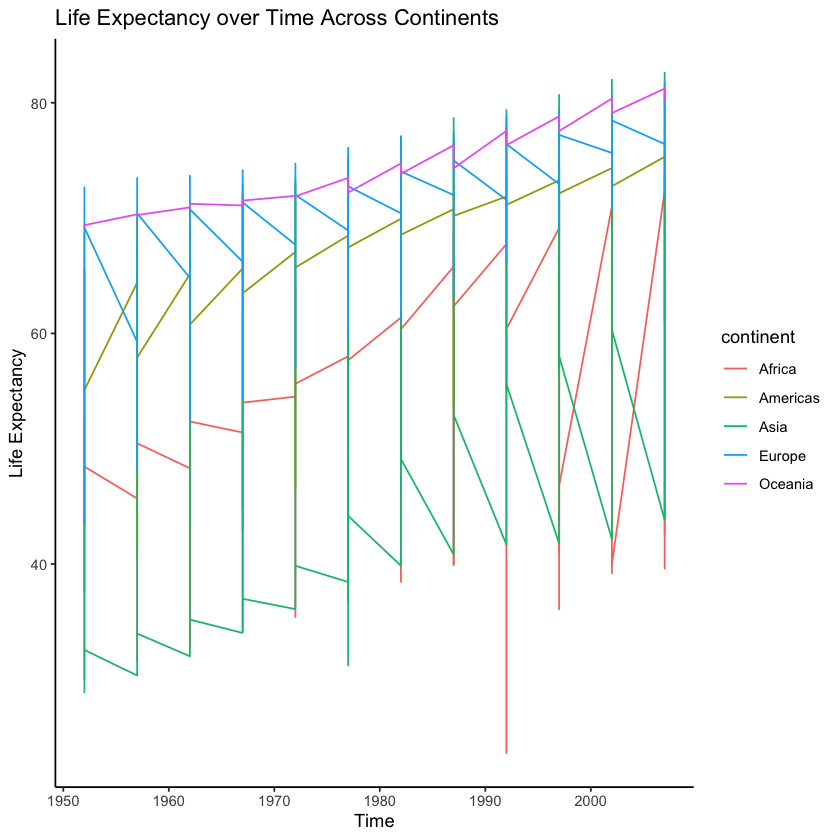

In [52]:
ggplot(gapminder, aes(x=year, y = lifeExp, color = continent)) + geom_line() + 
ggtitle("Life Expectancy over Time Across Continents") + scale_x_continuous(name = "Time") + 
scale_y_continuous(name = "Life Expectancy") + theme_classic()

Hmm, this plot looks a bit weird and unexpected, making it difficult for us to easily interpret the data trends. What is causing this?

> The data are discrete - we are looking at one year to the next and so using a continuous line actually makes the data look not continuous.

Now, let’s try to separate the data by country, plotting one line for each country. Modify the code from the previous plot to do so.

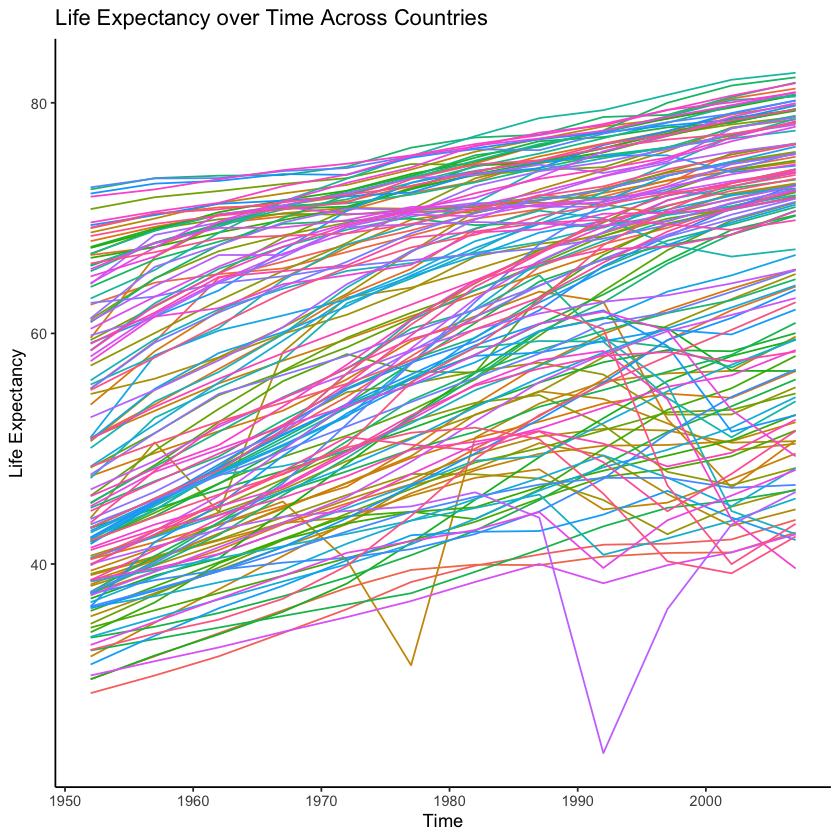

In [53]:
ggplot(gapminder, aes(x=year, y = lifeExp, color = country)) + geom_line() + 
ggtitle("Life Expectancy over Time Across Countries") + scale_x_continuous(name = "Time") + 
scale_y_continuous(name = "Life Expectancy") + theme_classic() + theme(legend.position = "none")


But what if we want to visualize both lines and points on our graph? There are two primary ways to do this - taking advantage of what we know about using layers for ggplot (each layer is drawn on top of the previous layer). 

* Method 1: Plot black points on top of the colorful lines
* Method 2: Plot black points underneath the colorful lines

Modify the code from the previous question to create two plots, one for each method.

*Hint: to control the color of the points, think about where the aesthetic color attribute should be located e.g., in the global plot options or in a specific layer.*

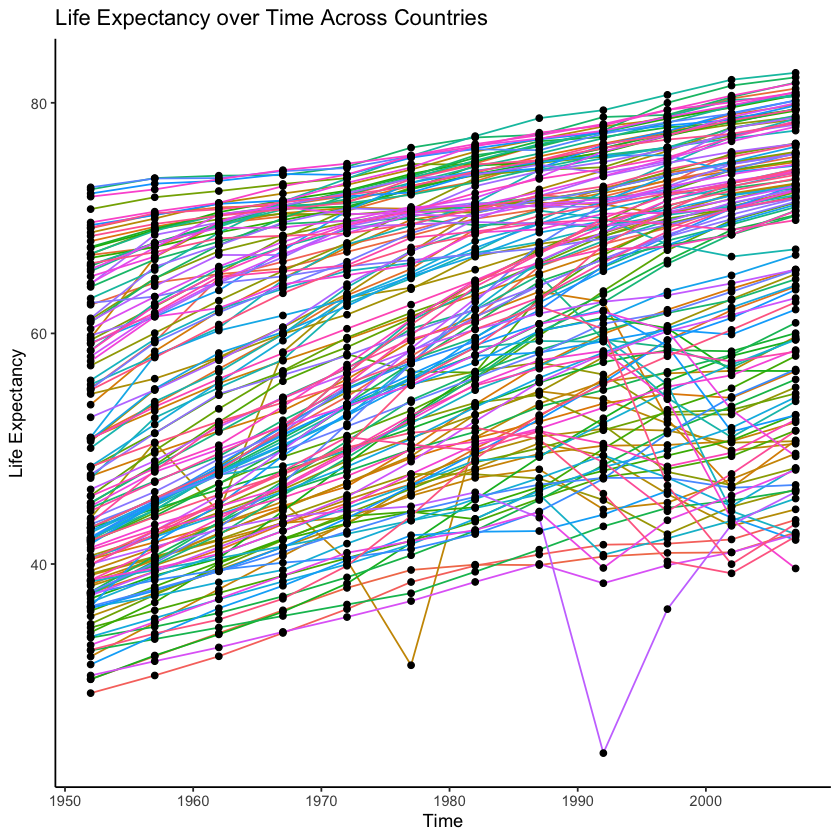

In [54]:
# method 1

ggplot(gapminder, aes(x=year, y = lifeExp)) + geom_line(aes(color = country)) + 
geom_point() + ggtitle("Life Expectancy over Time Across Countries") + scale_x_continuous(name = "Time") + 
scale_y_continuous(name = "Life Expectancy") + theme_classic() + theme(legend.position = "none")


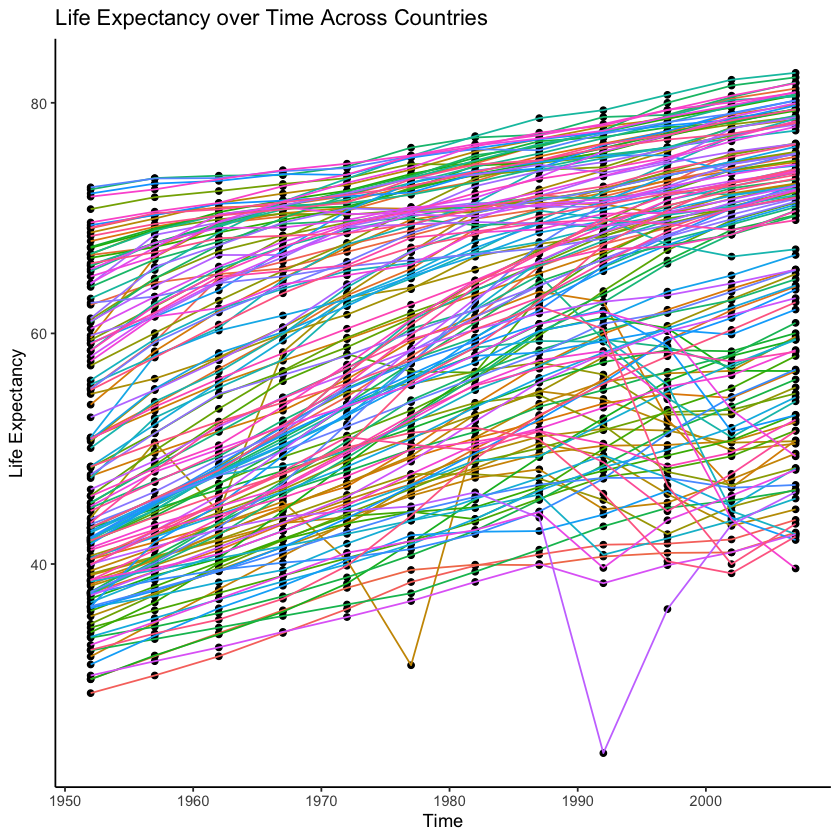

In [55]:
# method 2
ggplot(gapminder, aes(x=year, y = lifeExp)) + geom_point() + geom_line(aes(color = country)) + 
ggtitle("Life Expectancy over Time Across Countries") + scale_x_continuous(name = "Time") + 
scale_y_continuous(name = "Life Expectancy") + theme_classic() + theme(legend.position = "none")


---
# 2. Adding statistics (3 points)

`ggplot2` allows easy overlay of statistical models on top of the data. 

The graph below shows the relationship between life expectency and GDP per capita:

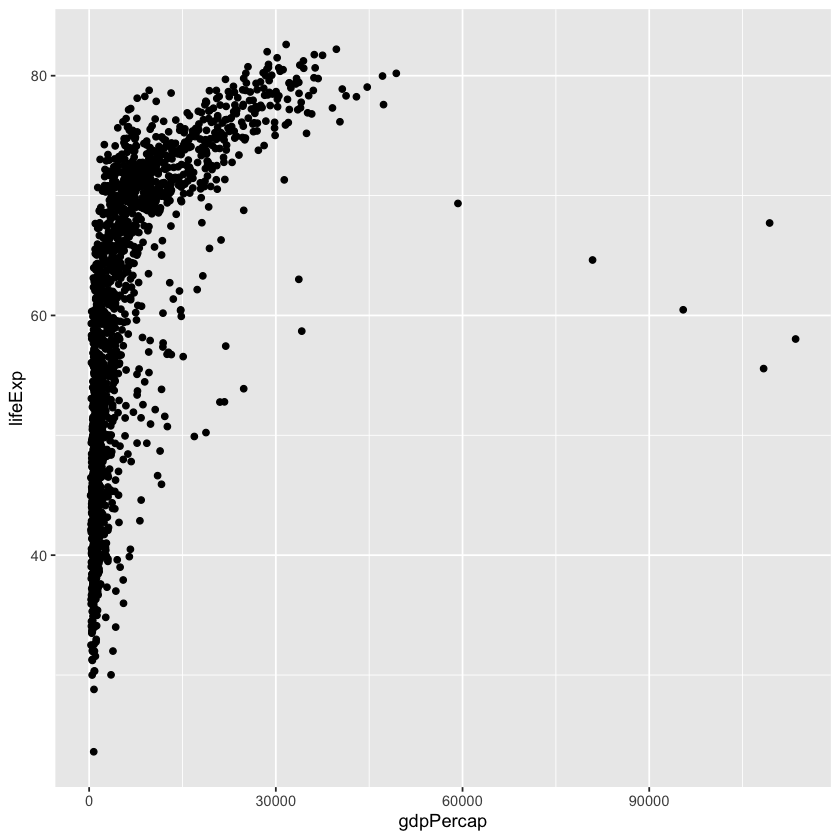

In [56]:
ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)) +
  geom_point()

However, the data points are squished close together on the left side of the graph, so it's hard to see the actual relationship we're interested in.

To fix this, we can change the scale of x-axis units using the scale functions. We can also make the data points transparent using the alpha function. This is helpful when there is a large amount of clustered data.

Modify the code above to incorporate these two changes (scale and transparency).

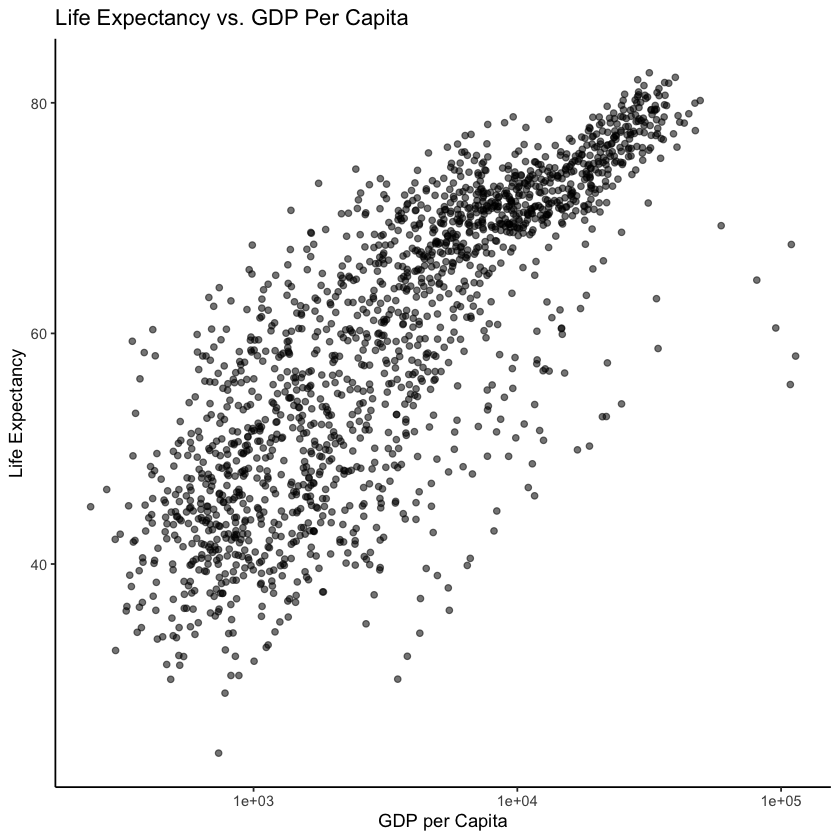

In [57]:
ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)) +
  geom_point(aes(alpha = 0.24), show.legend = FALSE) + scale_x_log10() + theme_classic() +
labs(title = "Life Expectancy vs. GDP Per Capita", x = "GDP per Capita",y = "Life Expectancy")

Already we can more easily visualize the trend in the data. 

Next, let's overlay statistics by fiting a simple relationship to the data. Modify the code from the previous question by adding a `geom_smooth` layer.

`geom_smooth()` using formula 'y ~ x'



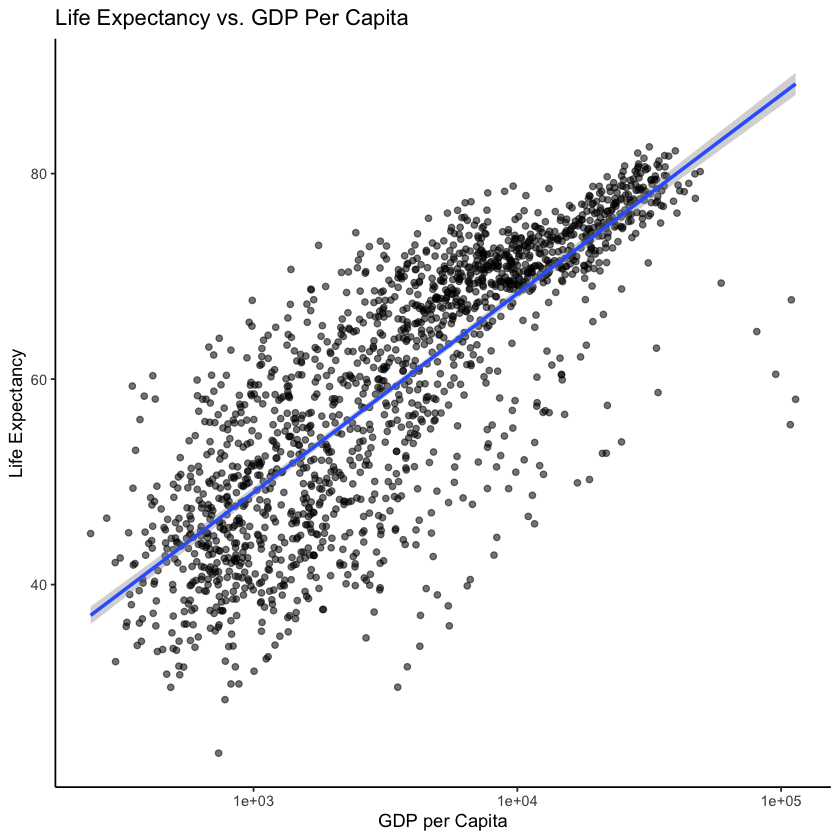

In [58]:
ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)) +
  geom_point(aes(alpha = 0.24), show.legend = FALSE) + scale_x_log10() + geom_smooth(method = "lm") + theme_classic() +
labs(title = "Life Expectancy vs. GDP Per Capita", x = "GDP per Capita",y = "Life Expectancy")

## Tim or Amy, how do you suggest turning off warning messages or other messages using jupyter notebook with R kernel?
## In R markdown I can easily do this but have never tried in Jupyter Notebook!

Again, we can add a layer of detail by introducing separate colors for each continent. We can also create individual trendlines for each continent, instead of only one trendline.

Modify the code from the previous question to add these elements. 


`geom_smooth()` using formula 'y ~ x'



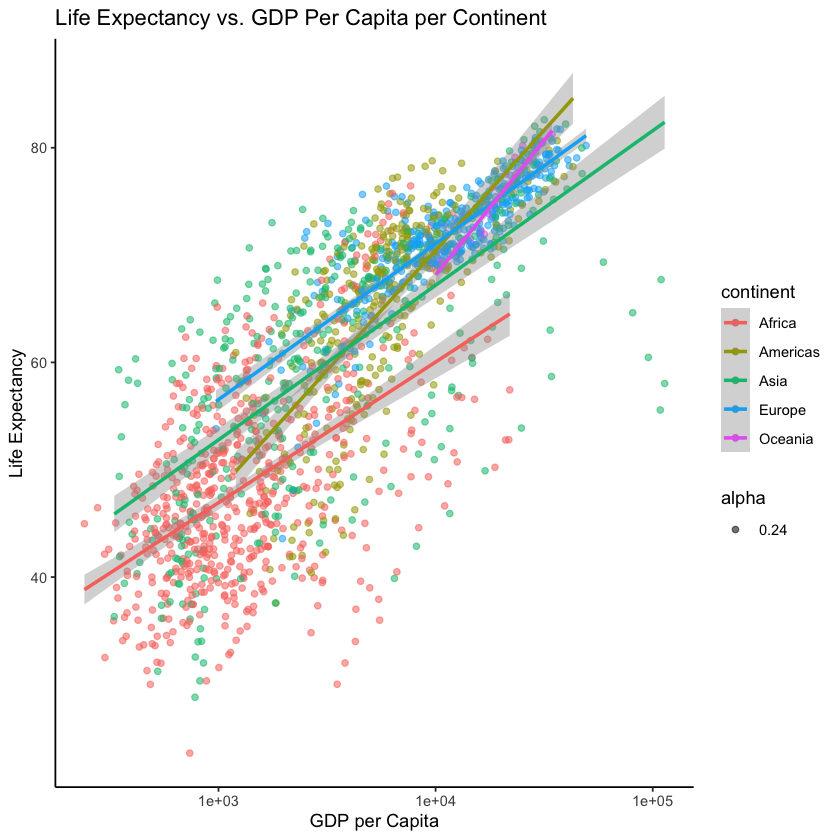

In [59]:
ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp, color = continent)) +
  geom_point(aes(alpha = 0.24)) + scale_x_log10() + geom_smooth(method = "lm") + theme_classic() + 
labs(title = "Life Expectancy vs. GDP Per Capita per Continent", x = "GDP per Capita",y = "Life Expectancy")


---
# 3. Multipanel figures (3 points)

In question 1, we visualized the change in life expectancy over time for every country in one plot. An alternative method is to use facet panels to split each country into its own plot.

First, create a subset of data that only includes the 25 countries from the `Americas` continent. Now we can add a `facet_wrap` layer to our line plot to create the panels by country. Additionally, to make the x-axis values easier to read, add a `theme` layer to rotate the text by 45 degrees.

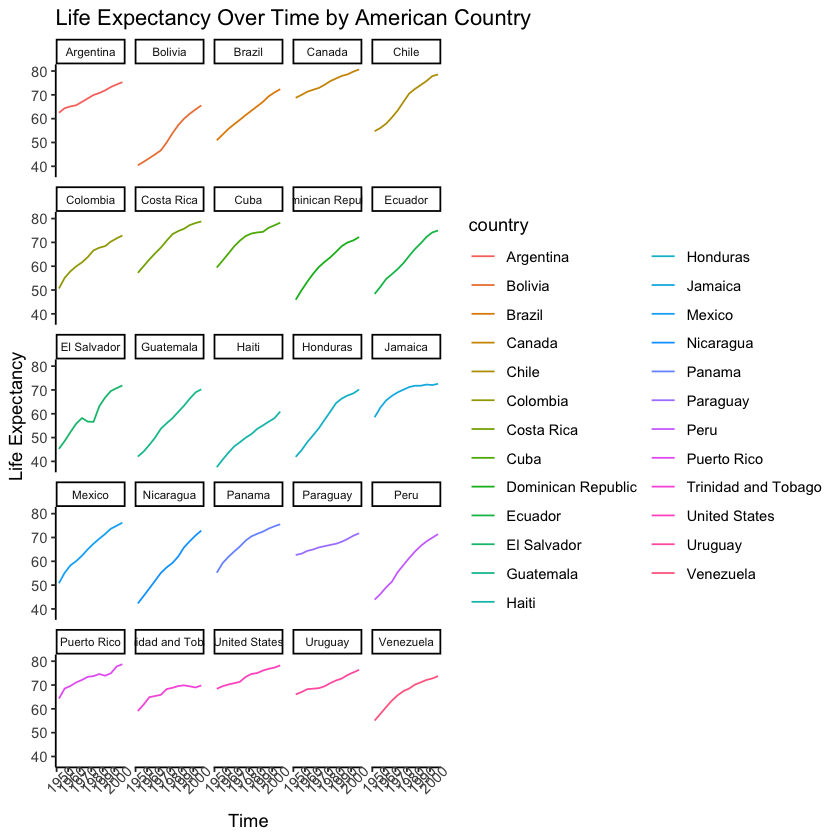

In [60]:
library(tidyverse)
filter(gapminder, continent == "Americas") -> gapminder_america

ggplot(gapminder_america, aes(x=year, y = lifeExp, color = country)) + 
geom_line() + ggtitle("Life Expectancy Over Time by American Country") + facet_wrap(vars(country)) + 
scale_x_continuous(name = "Time") + scale_y_continuous(name = "Life Expectancy") + 
theme_classic() + theme(axis.text.x = element_text(angle = 45), strip.text = element_text(size=7))




Imagine that we wanted to publish this figure in a manuscript. Make the following changes to the code from the previous question to create a cleaner figure:

* Change the y-axis label (using `labs` layer)
* Add a figure title (using `labs` layer)
* Add a legend (using `labs` layer)
* Rotate x-axis value text to 90 degrees

*Hint: legend titles are set using the same names used in the aes specification. So, we need to add a `color` aes mapping to the global plot definition and reference this in the `labs` layer to specify the legend name.*

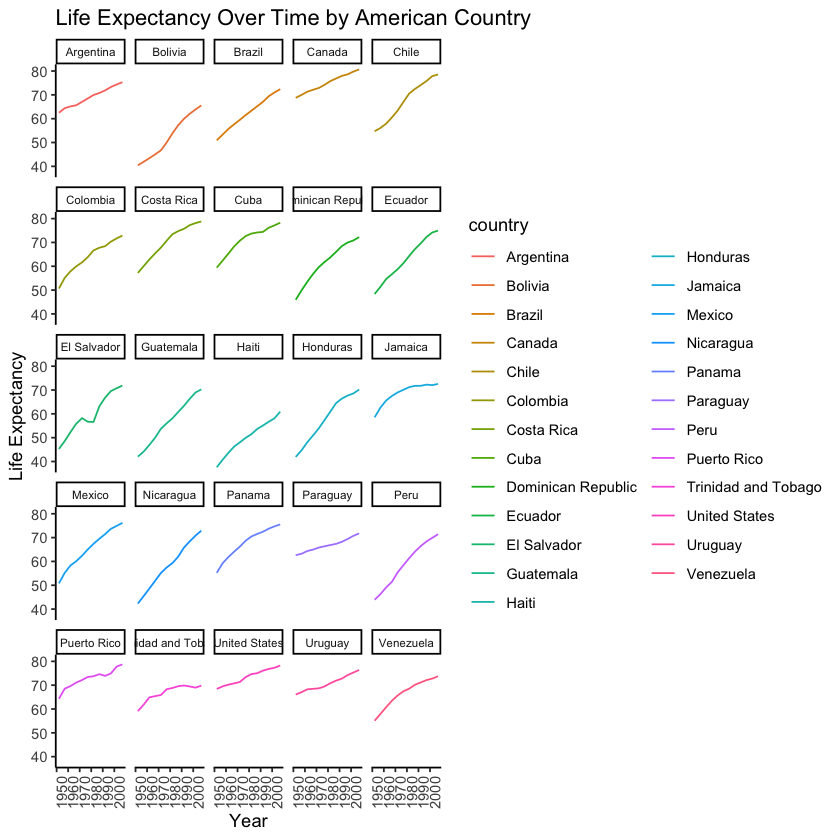

In [61]:
ggplot(gapminder_america, aes(x=year, y = lifeExp, color = country)) + geom_line() + 
labs(title = "Life Expectancy Over Time by American Country", x = "Year",y = "Life Expectancy",color = "country") + 
facet_wrap(vars(country)) + theme_classic() + theme(axis.text.x = element_text(angle = 90), 
                                                    strip.text = element_text(size=7))

Now let's look at how life expectancy varies by continent over time. Create a multipanel figure where each panel contains five boxplots (one for each continent) and each panel represents one year of data. Include a legend instead of x-axis title and labels.

*Hint: the `theme` layer allows you to set attributes as `element_blank()`.*

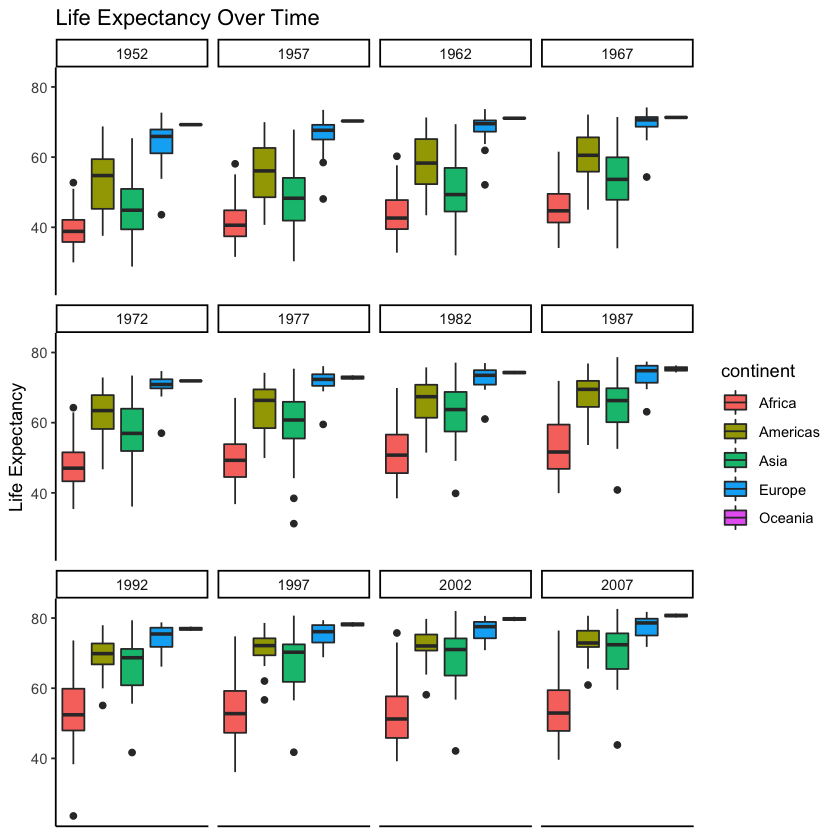

In [62]:
ggplot(gapminder, mapping = aes(x=continent, y=lifeExp, fill=continent)) +
  geom_boxplot() + facet_wrap(vars(year)) + ggtitle("Life Expectancy Over Time") + theme_classic() +
  theme(axis.text.x = element_blank(), axis.ticks.x = element_blank(), axis.title.x = element_blank()) + 
  scale_y_continuous(name = "Life Expectancy")


That's all for Homework 3! When you are finished, save the notebook as Homework3.ipynb, push it to your class GitHub repository and send the instructors a link to your notebook via Canvas. 

**DUE:** 5pm EST, Feb 24, 2022

**IMPORTANT** Did youcollaborate with anyone on this assignment? If so, list their names here. 
> Monique Tardif, ggplot extraordinare!